In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb

In [44]:
df = pd.read_csv('pima.csv')

# EDA

In [45]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [47]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [48]:
df.shape

(768, 9)

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


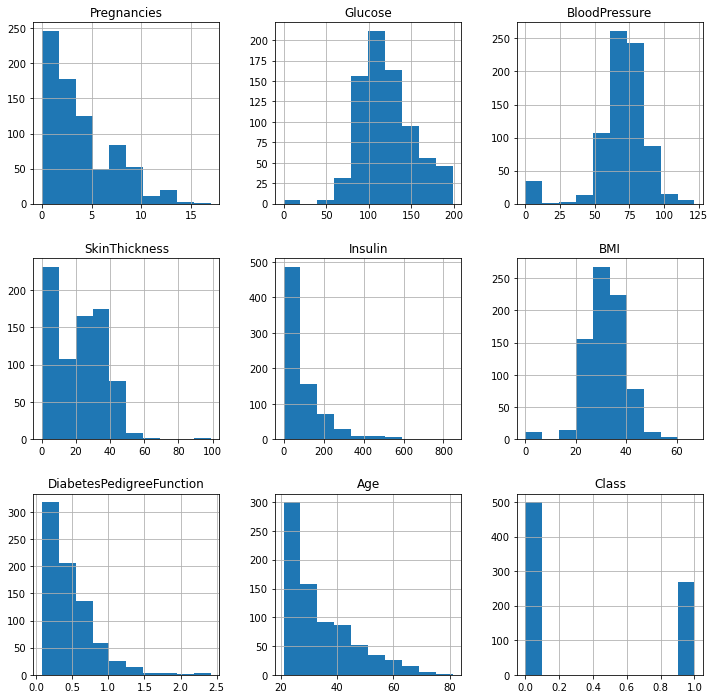

In [50]:
df.hist(figsize=(12,12))
plt.show()

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


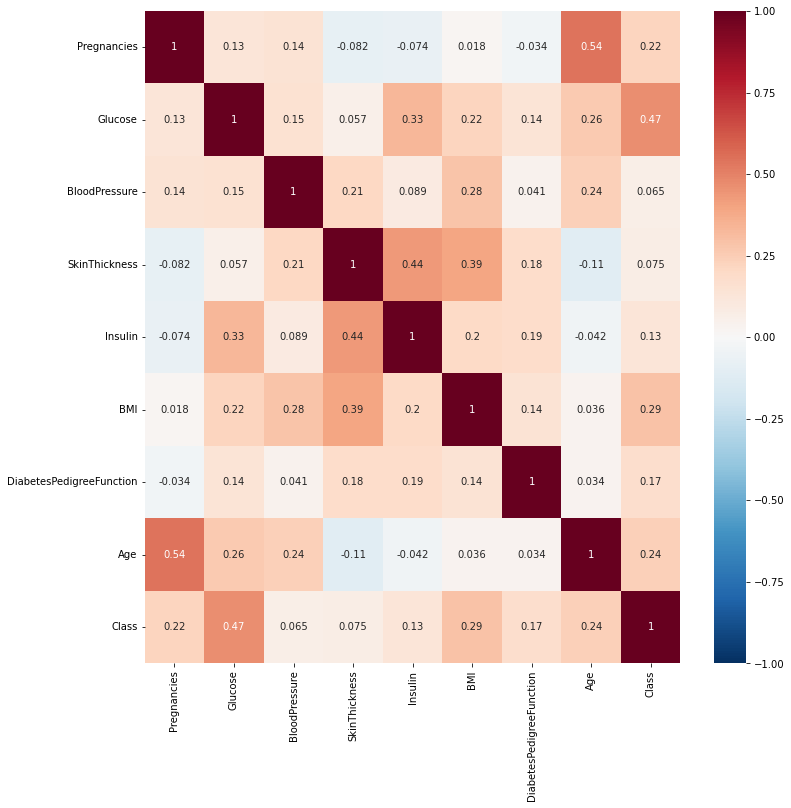

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

# Outlier Detection

In [53]:
def detect_outlier(data_1):
    outliers=[]
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [54]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Pregnancies'>

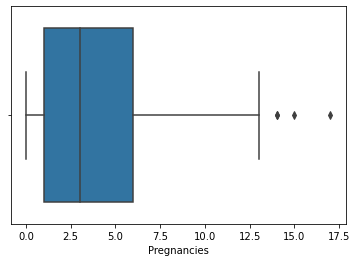

In [55]:
sns.boxplot(df['Pregnancies'])

In [56]:
outlier_datapoints = detect_outlier(df['Pregnancies'])
outlier_datapoints

[15, 17, 14, 14]

<AxesSubplot:xlabel='Glucose'>

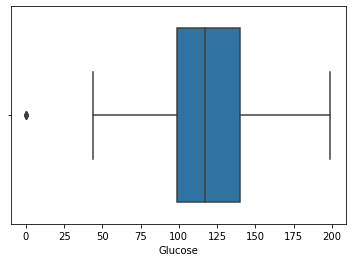

In [57]:
sns.boxplot(df['Glucose'])

In [58]:
outlier_datapoints = detect_outlier(df['Glucose'])
outlier_datapoints

[0, 0, 0, 0, 0]

<AxesSubplot:xlabel='BloodPressure'>

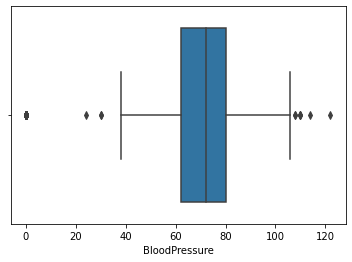

In [59]:
sns.boxplot(df['BloodPressure'])

In [60]:
outlier_datapoints = detect_outlier(df['BloodPressure'])
outlier_datapoints

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

<AxesSubplot:xlabel='SkinThickness'>

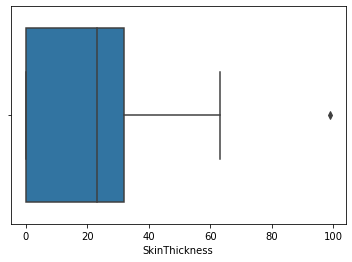

In [61]:
sns.boxplot(df['SkinThickness'])

In [62]:
outlier_datapoints = detect_outlier(df['SkinThickness'])
outlier_datapoints

[99]

<AxesSubplot:xlabel='Insulin'>

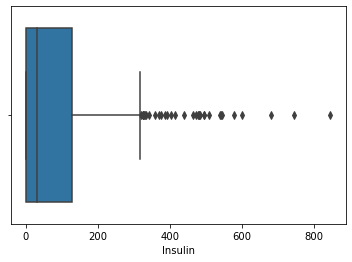

In [63]:
sns.boxplot(df['Insulin'])

In [64]:
outlier_datapoints = detect_outlier(df['Insulin'])
outlier_datapoints

[543,
 846,
 495,
 485,
 495,
 478,
 744,
 680,
 545,
 465,
 579,
 474,
 480,
 600,
 440,
 540,
 480,
 510]

<AxesSubplot:xlabel='BMI'>

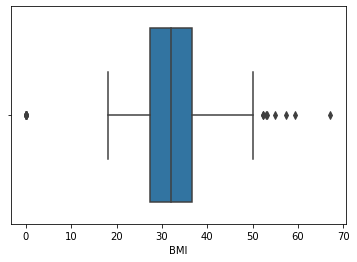

In [65]:
sns.boxplot(df['BMI'])

In [66]:
outlier_datapoints = detect_outlier(df['BMI'])
outlier_datapoints

[0.0, 0.0, 0.0, 0.0, 0.0, 67.1, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

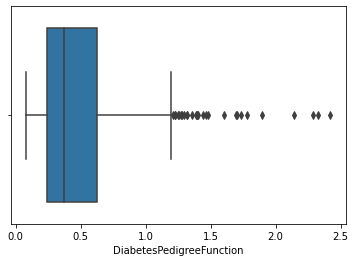

In [67]:
sns.boxplot(df['DiabetesPedigreeFunction'])

In [68]:
outlier_datapoints = detect_outlier(df['DiabetesPedigreeFunction'])
outlier_datapoints

[2.288, 1.893, 1.781, 2.329, 1.476, 2.137, 1.731, 1.6, 2.42, 1.699, 1.698]

<AxesSubplot:xlabel='Age'>

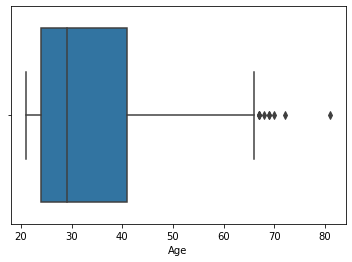

In [69]:
sns.boxplot(df['Age'])

In [70]:
outlier_datapoints = detect_outlier(df['Age'])
outlier_datapoints

[69, 72, 81, 70, 69]

# PCA

In [71]:
X = df.drop("Class", axis=1)
y = df.Class

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [73]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
pca = PCA(.95)

In [75]:
pca.fit(X_train)

PCA(n_components=0.95)

In [76]:
pca.n_components_

7

In [77]:
pca.explained_variance_ratio_

array([0.25533281, 0.22070281, 0.12800509, 0.11125003, 0.09715756,
       0.08800606, 0.05126467])

# Classification

In [78]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [79]:
xgb_cl = xgb.XGBClassifier()

In [80]:
xgb_cl.fit(X_train, y_train)

[12:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
preds = xgb_cl.predict(X_test)

In [82]:
accuracy_score(y_test, preds)

0.7207792207792207

In [83]:
accuracy_score(y_test, preds)*100

72.07792207792207